## Création de votre premier réseau de neurones

Ce notebook permet de créer un premier réseau de neurone qui va classifier des données regroupées de différentes façon en s'inspirant de https://playground.tensorflow.org  
Entrainez-vous sur cette page dans un premier temps puis attaquez le code.


Le code ci-dessous est le code Python permettant de créer votre réseau avec 2 populations séparées (Gaussian)

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys
import random as rd

def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

## Création des données d'entrainement

In [2]:
datas = []
labels = []
nbr_points = 10000

abs1 = np.random.normal(-2,.75,nbr_points)
ord1 = np.random.normal(-2,.75,nbr_points)
labels1 = np.zeros(nbr_points)                 # on attendra [1,0] en sortie pour ces données

abs2 = np.random.normal(2,.75,nbr_points)
ord2 = np.random.normal(2,.75,nbr_points)
labels2 = np.zeros(nbr_points) + 1          # on attendra [0,1] en sortie pour ces données

abss = list([abs1,abs2])
abss = np.array(abss).ravel()

ords = list([ord1,ord2])
ords = np.array(ords).ravel()

labels = list([labels1,labels2])
labels = np.array(labels).ravel()


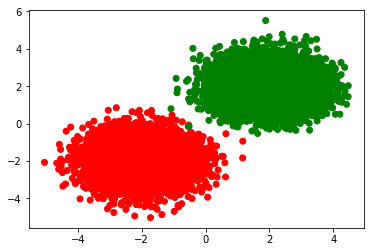

In [3]:
c = ['red','green']
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.show()

In [4]:
datas = np.array([[abss[i],ords[i]] for i in range(2*nbr_points)])
len(datas)
datas_df = np.array([list(data)+[color] for (data,color) in zip(datas, colors)])

In [5]:
list(datas[0])+[labels[0]]

[-1.9896646291527074, -1.8172307840953998, 0.0]

In [6]:
df = pd.DataFrame(datas_df, columns=['abs','ord','couleur'])
df

abs                  ord couleur
0      -1.9896646291527074  -1.8172307840953998     red
1      -0.8689053943713085  -1.9933315232376319     red
2      -1.8790544291906686   -2.177902575729184     red
3      -2.1024175489725407   -2.863638356546907     red
4       -2.470320042272051  -0.9380086643854191     red
5      -2.6776334634261363  -1.0881849101681613     red
6      -1.7008806910416194  -1.5812834133055254     red
7      -2.9107051229101097  -1.6443429279581028     red
8      -2.7387779950766253   -2.913682683611023     red
9      -3.3682518627628637   -3.508596017120274     red
10      -2.047969389009442  -3.0526881116891125     red
11     -0.9134641922549158  -1.1169691575684155     red
12       -3.87344132105268  -2.7205773690888537     red
13      -2.420003342415003   -2.592934731255519     red
14     -1.7020743797655025  -2.2590702000284115     red
15     -2.8847745827180367   -2.052841632460877     red
16     -1.9753579086377322  -0.9374315333262349     red
17      -2.817961823391088   -2.670003320264817     red
18      -2.416006192289968  -1.5670836935925783     red
19     -1.4193436339798953  -2.1640826286499064     red
20     -2.0201436868223936  -2.4136471724342794     red
21      -3.034274366906315  -2.0933023525303738     red
22     -1.8855568260562636  -2.8374796240727136     red
23     -1.6181826932624919   -2.156537136761462     red
24     -2.5008673185684844  -2.8307022019034704     red
25      -1.729888647182615  -1.5701652241670545     red
26     -1.7259318075077927   -2.170877515077222     red
27       -2.24943555691108  -1.7907534291669274     red
28     -2.4905724414910484  -2.1255207268623044     red
29     -1.4235966380301375  -1.3383200865932503     red
...                    ...                  ...     ...
19970   3.0064656358303607   1.1843567819947471   green
19971  0.24209798399830684   1.2930289851640455   green
19972   1.9940027647377507   2.2657703725205796   green
19973   2.9168841629526763    2.797911622786561   green
19974   2.5128166177128515   2.8752365098223978   green
19975   0.7242879370557604    1.547531358351614   green
19976    1.235815697935214    2.789044910399356   green
19977   2.5456327713171456   1.1973040082832045   green
19978   1.7660209044564084   1.5975453288893253   green
19979    2.212932495856188   2.2005322509451513   green
19980   2.4017715541162903   0.5558370748725063   green
19981   2.3751327411883514   1.8012853553124468   green
19982    2.526520948733151   2.2477833512274965   green
19983   1.0013450724849522    1.694450549638614   green
19984   2.1288639994454392   1.9456168820788995   green
19985   2.1423340911684567   1.7228549563848221   green
19986   0.9685686137033946    1.869029411088457   green
19987   2.3986444992221605   1.3586241997289985   green
19988   2.5086626923619733    2.193363712300403   green
19989   1.9623976286676788   1.2304785493401276   green
19990    2.483212840322828   0.6537813742516505   green
19991   0.9210728630552214   2.5554282109203306   green
19992    2.462843791193711   1.9319974780027351   green
19993    1.386958871485704    2.499372443574805   green
19994    3.224271173696735    2.655405795528787   green
19995   2.4751756305435744   1.9788005379195899   green
19996    1.946305977232542   1.9761220888069764   green
19997   2.5395719432120405   2.6551760160627076   green
19998   1.8161779176146695   0.9391111806534731   green
19999    3.052719243781467    2.135142221127117   green

[20000 rows x 3 columns]

## Création du modèle

In [7]:
# model creation
model = tf.keras.models.Sequential()

### Ajout d'une couche de 2 neurones

In [8]:
# Add the layers
model.add(tf.keras.layers.Dense(2, activation="softmax"))  # softmax va automtiquement faire le lien entre l'indice du max et le labels

## Exemple de prédiction sans entraînement

In [9]:
# output example
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", index_max(list(model_output[0])))
print("Should be : ", labels[0:1][0])

Instructions for updating:
Colocations handled automatically by placer.
[[0.8185111  0.18148884]]
Found :  0
Should be :  0.0


## Résumé du modèle (couche de neurones)

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [11]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

In [12]:
labels

array([0., 0., 0., ..., 1., 1., 1.])

## Entraînement
On prend par exemple 20% de données de validation, et on entraine le modèle sur 10 epochs

In [13]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 1s 76us/sample - loss: 0.0655 - acc: 0.9893 - val_loss: 0.0276 - val_acc: 0.9973
Epoch 2/10
16000/16000 [==============================] - 1s 52us/sample - loss: 0.0169 - acc: 0.9991 - val_loss: 0.0167 - val_acc: 0.9980
Epoch 3/10
16000/16000 [==============================] - 1s 51us/sample - loss: 0.0110 - acc: 0.9995 - val_loss: 0.0126 - val_acc: 0.9985
Epoch 4/10
16000/16000 [==============================] - 1s 52us/sample - loss: 0.0084 - acc: 0.9996 - val_loss: 0.0104 - val_acc: 0.9987
Epoch 5/10
16000/16000 [==============================] - 1s 49us/sample - loss: 0.0069 - acc: 0.9996 - val_loss: 0.0090 - val_acc: 0.9990
Epoch 6/10
16000/16000 [==============================] - 1s 48us/sample - loss: 0.0059 - acc: 0.9997 - val_loss: 0.0080 - val_acc: 0.9990
Epoch 7/10
16000/16000 [==============================] - 1s 50us/sample - loss: 0.0052 - acc: 0.9997 - val_loss: 0.0

## Résumé de l'entraînement :
* comparaison des données d'entraînement et de validation

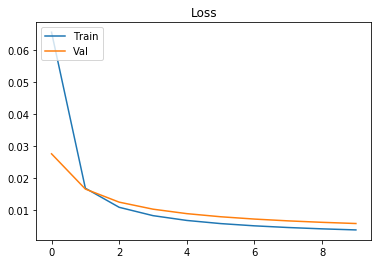

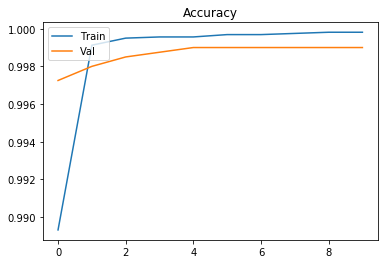

In [14]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

## On réalise nos premières prédictions sur des exemples évidents

In [15]:
datas_tests = np.array([[2,2],[-2,-2]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c[index_max(list(el))])
    
res
    

[[4.3312332e-04 9.9956685e-01]
 [9.9970347e-01 2.9648689e-04]]


['green', 'red']

## Sur des exemples moins évidents 
## le modèle donne un résultat mais peu fiable 
## ce qui est normal puisque l'on se trouve aux limites du modèle

In [16]:
c2 = ['darkred','chartreuse']

datas_tests = np.array([[0,0],[2,-2],[4,-4]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c2[index_max(list(el))])
    
res

[[0.5472531  0.45274693]
 [0.08097669 0.91902333]
 [0.00638196 0.993618  ]]


['darkred', 'chartreuse', 'chartreuse']

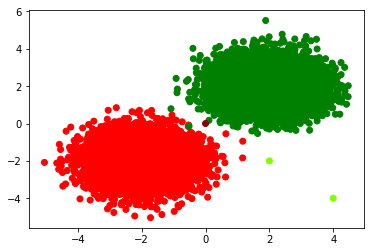

In [17]:
abstest = [ data[0] for data in datas_tests]
ordstest = [ data[1] for data in datas_tests]
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.scatter(abstest,ordstest, color = res)
plt.show()

### Exercice:

Créer un jeu de 2000 données de test comprenant datas et labels, pour tester le modèle précédent

In [18]:
# example
datas_test = np.array([[2,2],[-2,-2]])
labels_test = [1,0]

loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

2/2 [==============================] - 0s 447us/sample - loss: 3.6489e-04 - acc: 1.0000
Test Loss 0.00036489032208919525
Test Accuracy 1.0


[[4.3312332e-04 9.9956685e-01]
 [9.9970347e-01 2.9648689e-04]]


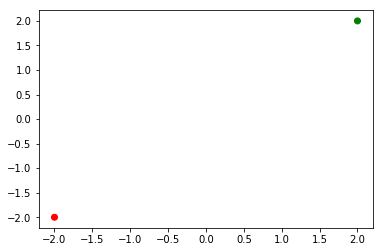

In [19]:

model_output = model.predict(datas_test)
print(model_output)
Colors = [c[index_max(list(model))] for model in model_output]

abstest = [ data[0] for data in datas_test]
ordstest = [ data[1] for data in datas_test]

plt.scatter(abstest,ordstest,color=Colors)

plt.show()


## -----------------------------------------------------------------------
## Création d'un second réseau de neurones

Le code ci-dessous est le code Python permettant de créer un réseau de neurones avec 2 populations séparées différemment (Exclusive Or)

### Essayons avec des données un peu moins bien réparties

## Création des données d'entraînement

In [20]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    if x*y >= 0:
        labels.append(0)
    else:
        labels.append(1)
        
datas = np.array(datas)

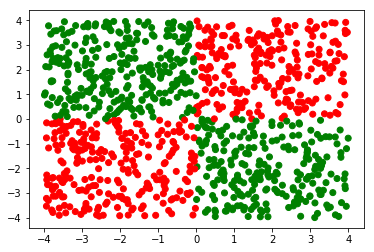

In [21]:
c = ['red','green']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

## Création du modèle

In [22]:
# model creation
model = tf.keras.models.Sequential()

### Ajout des couches de neurones
Il va falloir ajouter une couche de neurones pour complexifier notre modèle, sinon on n'arrivera jamais à obtenir un résultat satisfaisant.

In [23]:
# Add the layers
model.add(tf.keras.layers.Dense(4, activation="relu"))  # si vous avez tester, 4 suffisent pour obtenir un bon résultat
model.add(tf.keras.layers.Dense(2, activation="softmax"))  

## Exemple de prédiction sans entraînement

In [24]:
# output example
print(datas[0:1])
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", c[index_max(list(model_output[0]))])
print("Should be : ", c[labels[0:1][0]])

[[-1.39702173  1.67579178]]
[[0.07899124 0.9210088 ]]
Found :  green
Should be :  green


## Résumé du modèle (couches de neurones)

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              multiple                  12        
_________________________________________________________________
dense_2 (Dense)              multiple                  10        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [26]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

## Entraînement

In [27]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 0s 230us/sample - loss: 0.4801 - acc: 0.7038 - val_loss: 0.4495 - val_acc: 0.7550
Epoch 2/10
800/800 [==============================] - 0s 53us/sample - loss: 0.4389 - acc: 0.7650 - val_loss: 0.4191 - val_acc: 0.8150
Epoch 3/10
800/800 [==============================] - 0s 56us/sample - loss: 0.4047 - acc: 0.8325 - val_loss: 0.3920 - val_acc: 0.8500
Epoch 4/10
800/800 [==============================] - 0s 68us/sample - loss: 0.3749 - acc: 0.8775 - val_loss: 0.3663 - val_acc: 0.8850
Epoch 5/10
800/800 [==============================] - 0s 51us/sample - loss: 0.3485 - acc: 0.9000 - val_loss: 0.3433 - val_acc: 0.9150
Epoch 6/10
800/800 [==============================] - 0s 61us/sample - loss: 0.3249 - acc: 0.9087 - val_loss: 0.3226 - val_acc: 0.9450
Epoch 7/10
800/800 [==============================] - 0s 62us/sample - loss: 0.3041 - acc: 0.9162 - val_loss: 0.3040 - val_acc: 0.9600
Epoch 8/

## Le modèle est-il bien entraîné ?

In [30]:
datas_test = []
labels_test = []
#testenregistrement


nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    y = 8 * rd.random() - 4
    datas_test.append([x,y])
    if x*y >= 0:
        labels_test.append(0)
    else:
        labels_test.append(1)
        
datas_test = np.array(datas_test)

In [31]:
loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

1000/1000 [==============================] - 0s 24us/sample - loss: 0.2648 - acc: 0.9510
Test Loss 0.2648499844074249
Test Accuracy 0.951


### Exercice: 
Le résultat n'est pas très satisfaisant. Proposez deux façons d'améliorer la prédiction.

## Troisième réseau de neurones

### sur un exemple encore plus tordu... avec 3 populations

## A vous de jouer

In [ ]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    norm_carre = x**2 + y**2
    if norm_carre <= 4:
        labels.append(0)
    elif norm_carre <= 8:
        labels.append(1)
    else:
        labels.append(2)
        
datas = np.array(datas)

In [ ]:
c = ['red','green','yellow']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

### Construire un réseau de neurones correspondant